<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/data_visualitation/Data_Visualitation_A_Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/AirPassengersDates.csv')
df.head()

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-5,129
4,1949-05-24,121


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Day Name'] = df['Date'].dt.day_name()
df.head()

,Date,#Passengers,Month,Day,Year,Day Name
0,1949-01-12,112,1,12,1949,Wednesday
1,1949-02-24,118,2,24,1949,Thursday
2,1949-03-22,132,3,22,1949,Tuesday
3,1949-04-05,129,4,5,1949,Tuesday
4,1949-05-24,121,5,24,1949,Tuesday


Text(0.5, 1.0, 'Passengers per year')

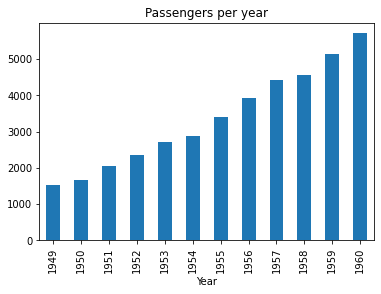

In [ ]:
passengers_per_year = df.groupby('Year')['#Passengers'].sum()

passengers_per_year.plot(kind = 'bar')
plt.title('Passengers per year')

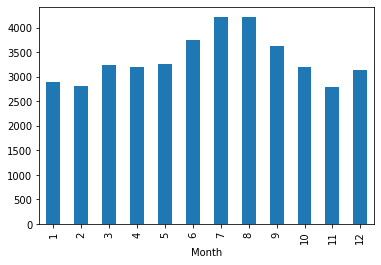

In [ ]:
passengers_per_month = df.groupby('Month')['#Passengers'].sum()

passengers_per_month.plot(kind = 'bar')

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(x = list(df['Date']), y = list(df['#Passengers'])))

# Set title
fig.update_layout(title_text = "Time series with range slider and selectors")

# Add range slider
fig.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count = 1,
                     label = "1m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 6,
                     label = "6m",
                     step = "month",
                     stepmode = "backward"),
                dict(count = 1,
                     label = "YTD",
                     step = "year",
                     stepmode = "todate"),
                dict(count = 1,
                     label = "1y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ])
        ),
        rangeslider = dict(
            visible = True
        ),
        type = "date"
    )
)

fig.show()